# Create a model that can predict prices. 

In [24]:
# pip install pandas numpy matplotlib seaborn yfinance scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [26]:
btc = yf.Ticker("BTC-USD")

In [27]:
btc_df = pd.DataFrame(btc.history(period="max"))

btc_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0


In [28]:
btc_df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-04-17 00:00:00+00:00,30317.146484,30319.197266,29275.371094,29445.044922,17872186762,0.0,0.0
2023-04-18 00:00:00+00:00,29449.091797,30470.302734,29154.849609,30397.552734,19480529496,0.0,0.0
2023-04-19 00:00:00+00:00,30394.187500,30411.054688,28669.898438,28822.679688,24571565421,0.0,0.0
2023-04-20 00:00:00+00:00,28823.683594,29076.400391,28037.257812,28245.988281,21340360360,0.0,0.0
2023-04-21 00:00:00+00:00,28273.242188,28349.968750,27252.136719,27342.699219,20366329856,0.0,0.0


In [29]:
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3139 entries, 2014-09-17 00:00:00+00:00 to 2023-04-21 00:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3139 non-null   float64
 1   High          3139 non-null   float64
 2   Low           3139 non-null   float64
 3   Close         3139 non-null   float64
 4   Volume        3139 non-null   int64  
 5   Dividends     3139 non-null   float64
 6   Stock Splits  3139 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 196.2 KB


In [30]:
btc_df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3139.000000,3139.000000,3139.000000,3139.000000,3.139000e+03,3139.0,3139.0
mean,13250.106137,13579.889989,12887.228417,13257.214621,1.660890e+10,0.0,0.0
std,16047.909867,16455.426035,15580.293081,16044.892915,1.974527e+10,0.0,0.0
min,176.897003,211.731003,171.509995,178.102997,5.914570e+06,0.0,0.0
25%,726.454987,738.511993,710.124512,730.409515,1.157075e+08,0.0,0.0
50%,7403.220215,7539.784668,7246.043945,7406.520020,9.244362e+09,0.0,0.0
75%,19155.573242,19422.261719,18743.748047,19164.957031,2.798164e+10,0.0,0.0
max,67549.734375,68789.625000,66382.062500,67566.828125,3.509679e+11,0.0,0.0


## Visualize Dataset

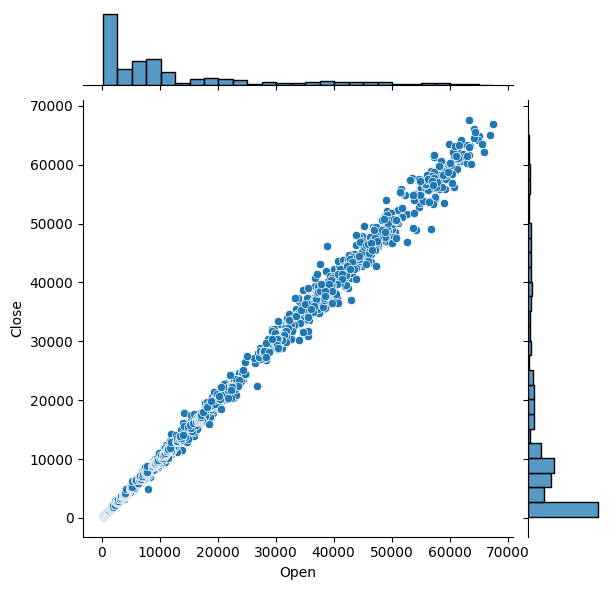

In [31]:
sns.jointplot(x="Open", y="Close", data=btc_df)

<Axes: xlabel='Open', ylabel='High'>

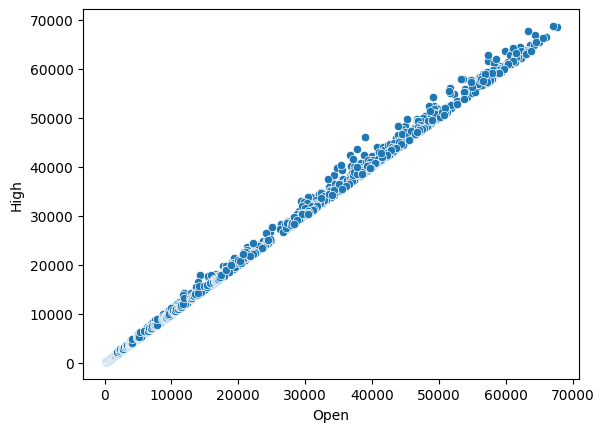

In [32]:
sns.scatterplot(x="Open", y="High", data=btc_df)

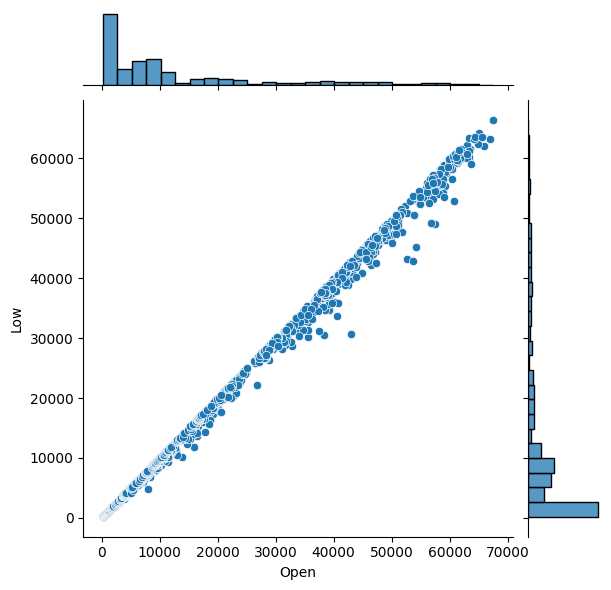

In [33]:
sns.jointplot(x="Open", y="Low", data=btc_df)

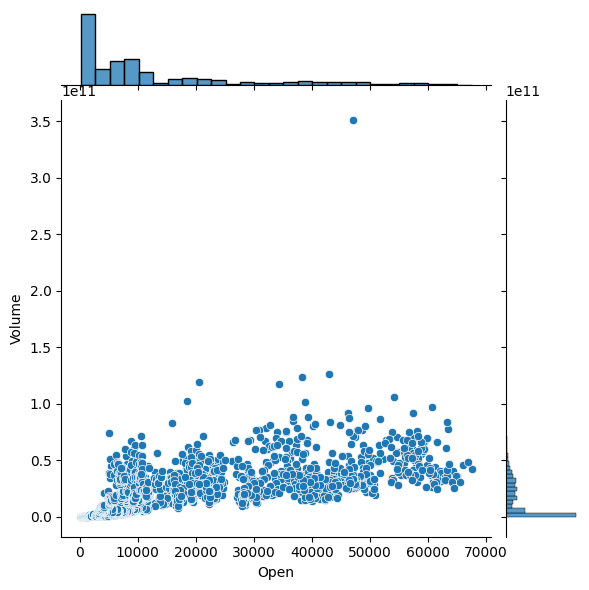

In [34]:
sns.jointplot(x="Open", y="Volume", data=btc_df)

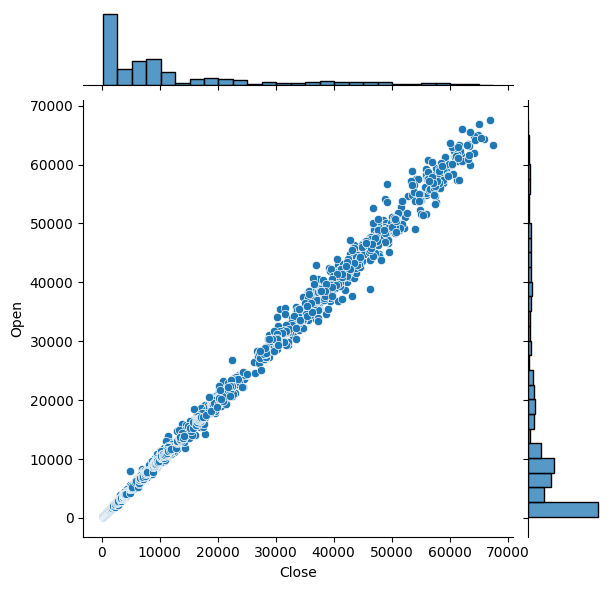

In [35]:
sns.jointplot(x="Close", y="Open", data=btc_df)

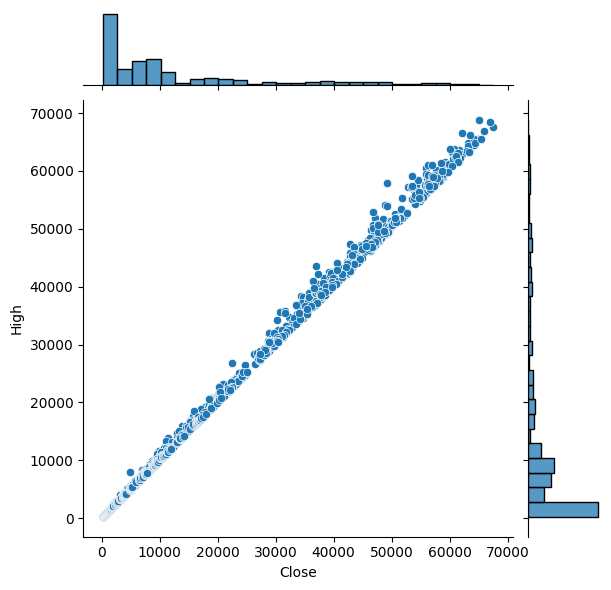

In [36]:
sns.jointplot(x="Close", y="High", data=btc_df)

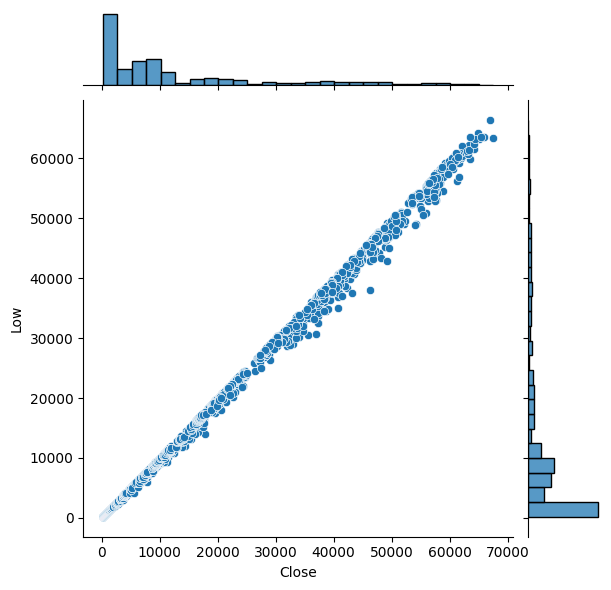

In [37]:
sns.jointplot(x="Close", y="Low", data=btc_df)

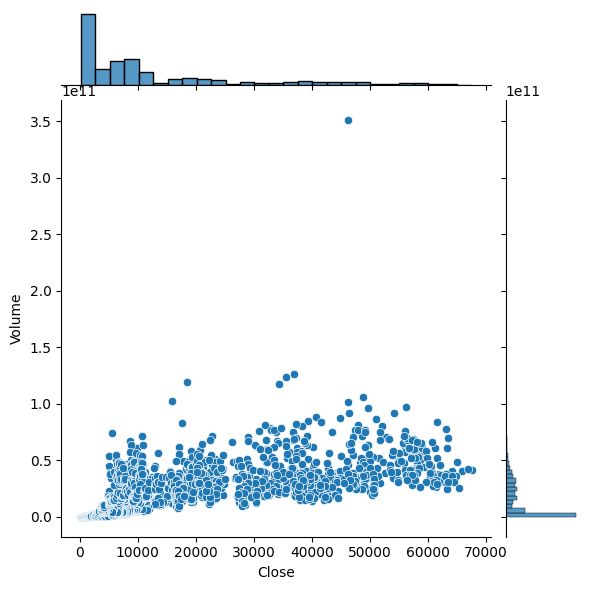

In [38]:
sns.jointplot(x="Close", y="Volume", data=btc_df)

KeyboardInterrupt: 

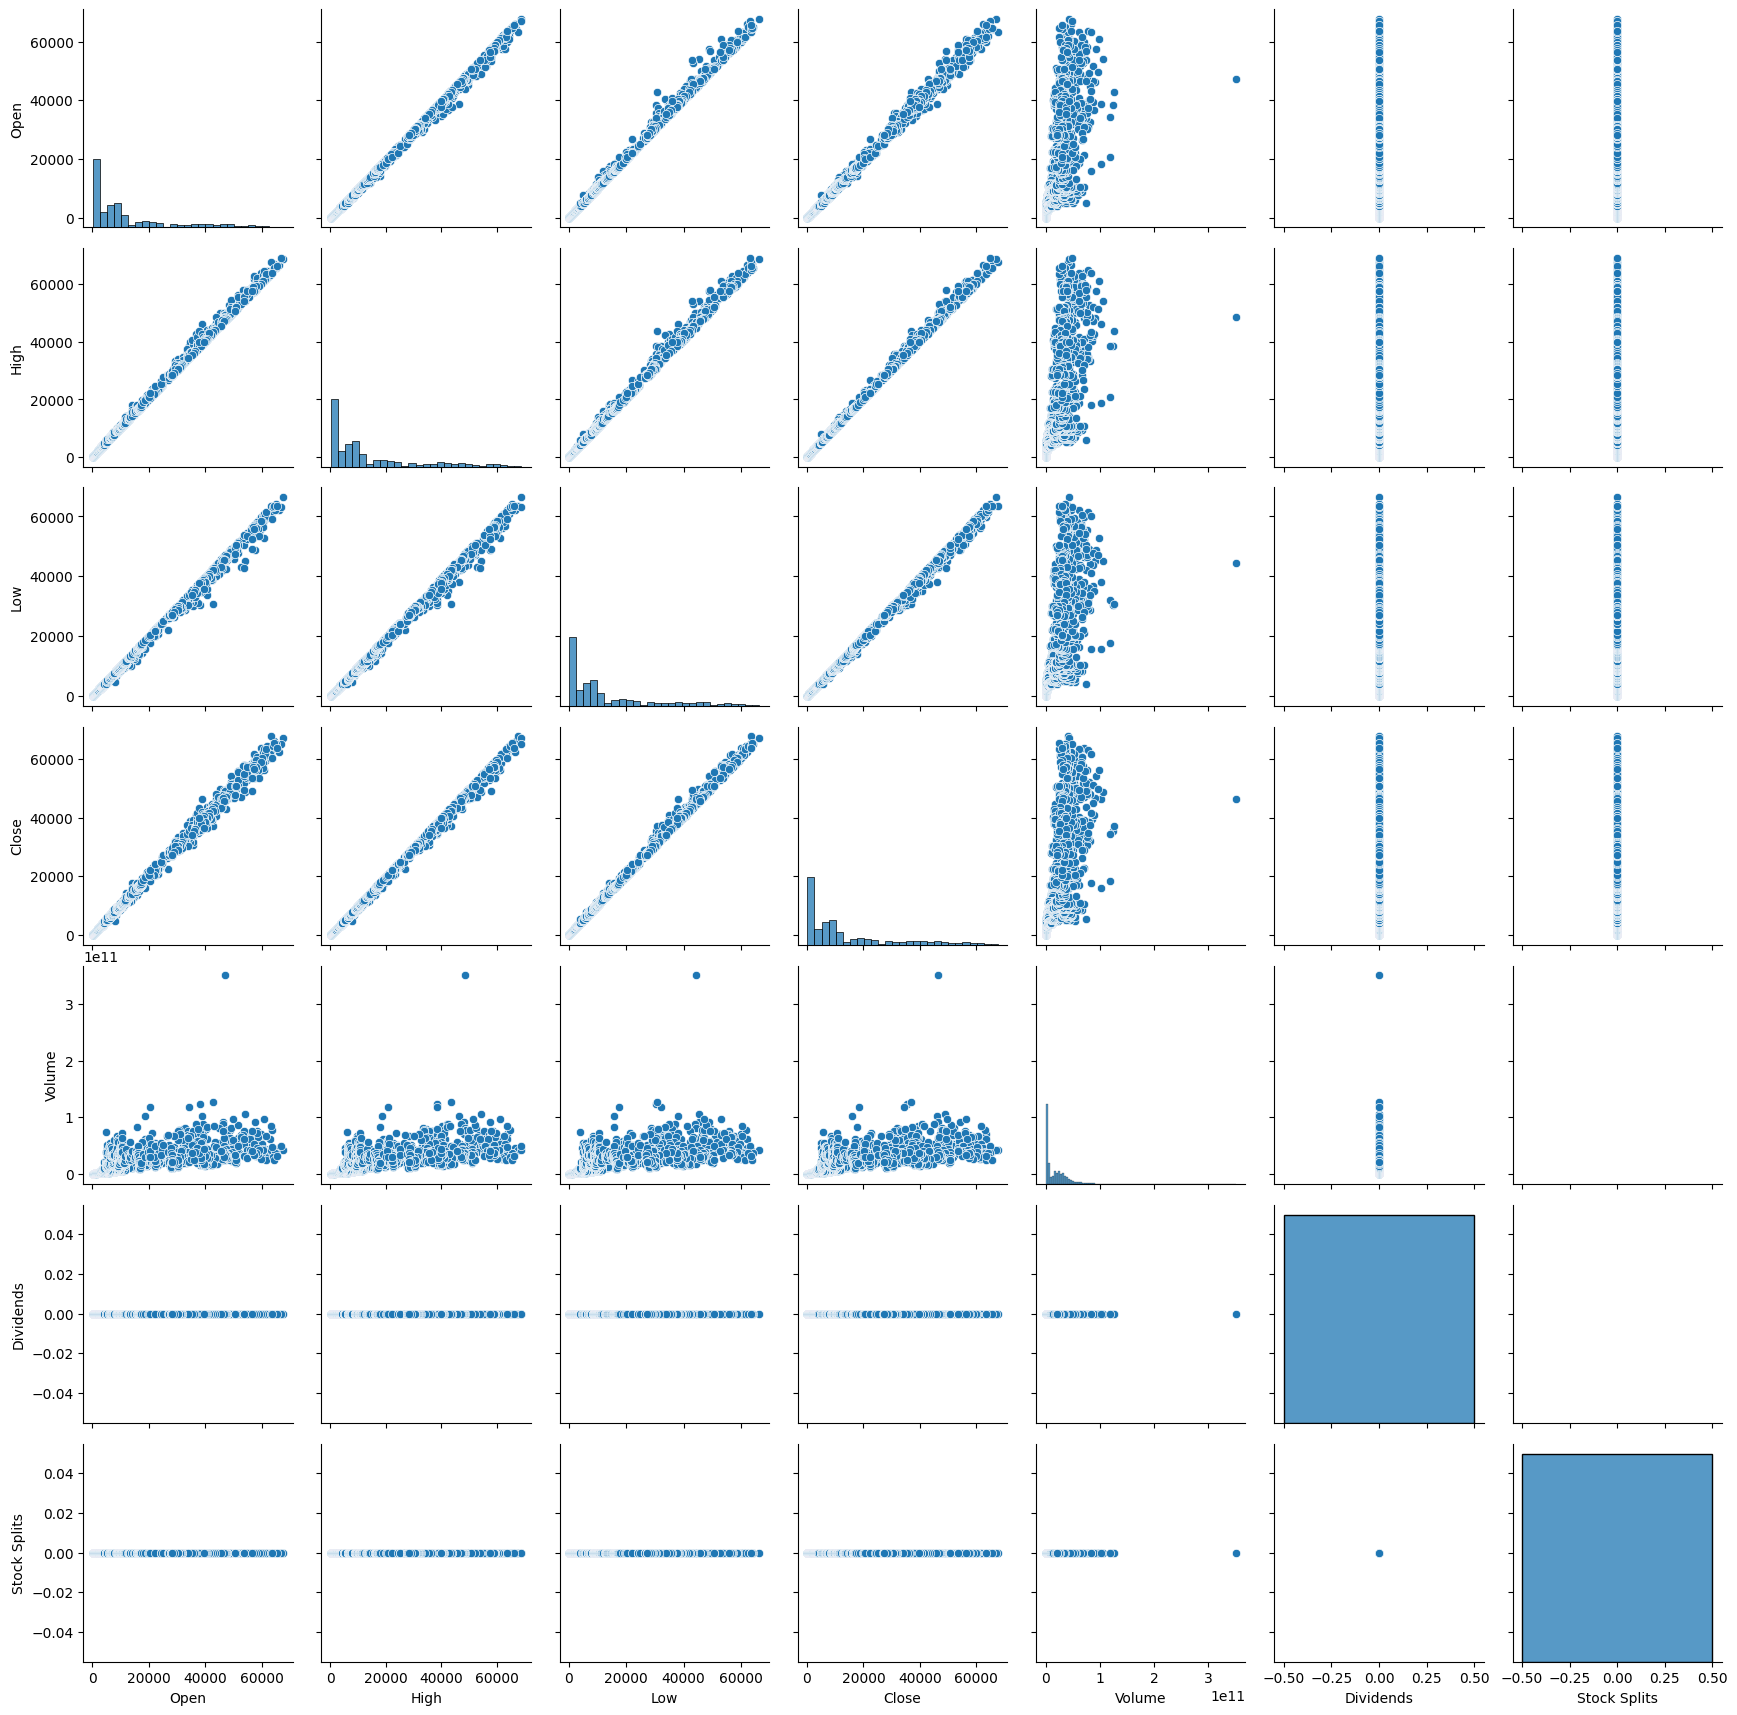

In [39]:
sns.pairplot(btc_df)

## Test and train the model

In [ ]:
X = btc_df[["Open", "High", "Low", "Volume"]]

In [ ]:
y = btc_df["Close"]

In [ ]:
X

,Open,High,Low,Volume
Date,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,21056800
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,34483200
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,37919700
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,36863600
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,26580100
...,...,...,...,...
2023-04-17 00:00:00+00:00,30317.146484,30319.197266,29275.371094,17872186762
2023-04-18 00:00:00+00:00,29449.091797,30470.302734,29154.849609,19480529496
2023-04-19 00:00:00+00:00,30394.187500,30411.054688,28669.898438,24571565421


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=92)

NameError: name 'train_test_split' is not defined